# **Edward Fabian Goyeneche Velandia**
## Signal Theory


## Red Neuronal con Keras


### Docentacion del data set "F1 Drivers dataset"
Ya sea que sea un entusiasta experimentado de los deportes de motor, un aspirante a científico de datos o un fanático curioso, este conjunto de datos abre las puertas a una gran cantidad de oportunidades analíticas. Explora la evolución de las estrategias de los pilotos, las adaptaciones específicas de las pistas y la dinámica de equipo que contribuyen a la intensa competencia presenciada en circuitos icónicos de todo el mundo. Descubra patrones, valores atípicos y tendencias que iluminan los matices de las carreras de F1 y arrojan luz sobre lo que separa a los campeones de los contendientes.



In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import SGD


In [45]:

# Cargar el conjunto de datos
df = pd.read_csv('F1drivers_Dataset.csv')

# Extraer las columnas 'race_entries' y 'race_wins' y convertirlas a arrays de numpy
podiums = df['Podiums'].to_numpy()
race_wins = df['Race_Wins'].to_numpy()

# Imprimir los datos extraídos
print("Posiciones de Pole:", podiums)
print("Victorias de Carreras:", race_wins)


Posiciones de Pole: [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.  23.  32.
   0.   0.   1.  99.   0.   1.   0.  11.   1.   0.   0.  19.   1.   0.
   9.   0.   0.   0.   0.  22.   2.  17.   0.   0.   0.   0.   1.   1.
   0.   1.   0.   0.   0.   0.   8.   0.   0.   0.   0.   0.  68.   0.
   0.   0.   0.   0.   0.   0.   0.   9.   0.   0.   0.   0.   8.   0.
   0.   0.  48.   1.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   3.   0.   0.   0.   2.   1.   0.   0.
   0.   0.  67.   0.   0.  15.   1.   0.   0.  31.   0.   0.   1.   0.
   0.   0.   0.   0.   0.   0.   0.  10.   0.   0.   0.   0.   9.   0.
   3.   0.   0.   0.   0.   0.   0.   0.   0.  50.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   3.   0.   1.   3.   0.   5.  13.   0.   0.
   0.   0.   0.   0.   0.   0.   9.   0.   0.   0.   1.   0.   0.   0.
   0.  32.   0.   9.   0.   0.   0.   0.   0.   0.   0.  62.   2.   0.
   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  

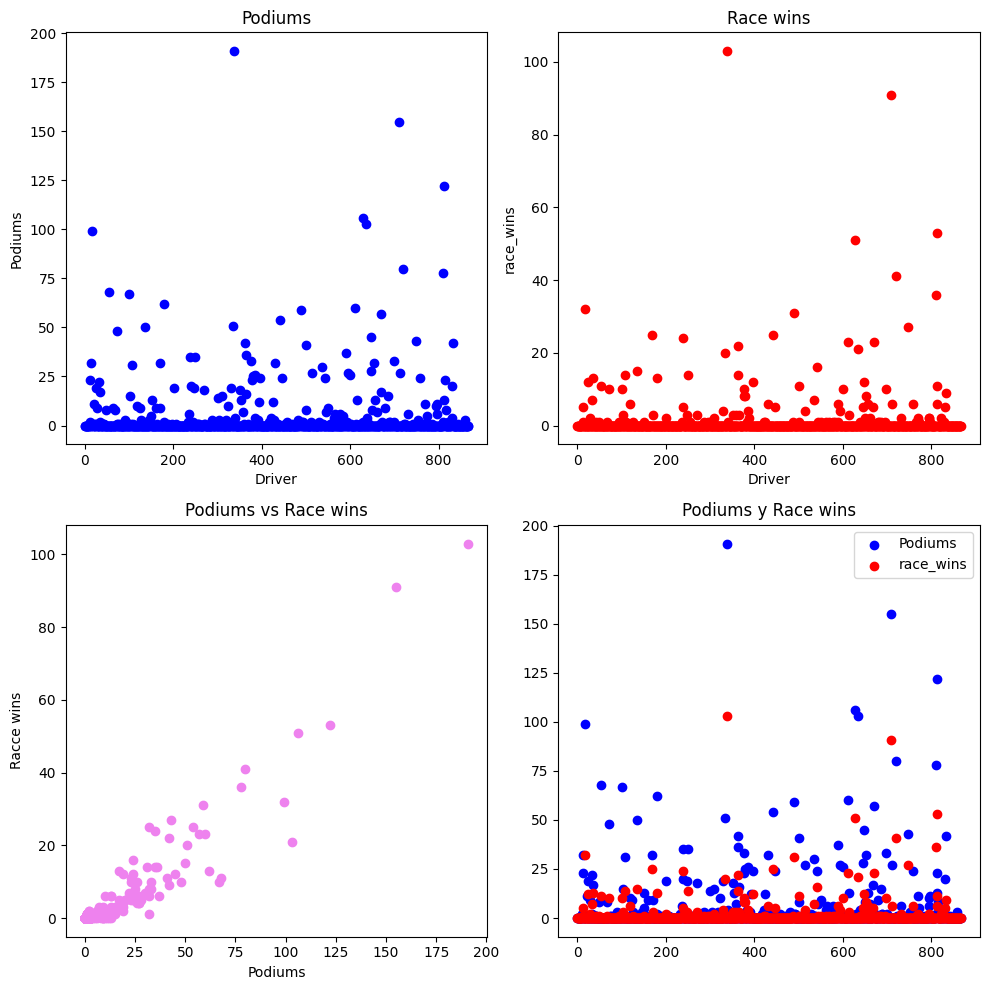

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Scatter plot of Race Wins vs Podiums
axs[0, 0].scatter(range(len(podiums)), podiums, color='blue')
axs[0, 0].set_title('Podiums')
axs[0, 0].set(xlabel='Driver', ylabel='Podiums')

#Grafico de didispersion de victorias de carreras
axs[0, 1].scatter(range(len(race_wins)),race_wins, color='red')
axs[0, 1].set_title('Race wins')
axs[0, 1].set(xlabel='Driver', ylabel = 'race_wins')



#Grafico de Dispersión de Podiums vs Victorias de Carreras  
axs[1, 0].scatter(podiums,race_wins, color='violet')
axs[1, 0].set_xlabel('Podiums')
axs[1, 0].set_ylabel('Racce wins')
axs[1, 0].set_title('Podiums vs Race wins')


#Grafico dedispersion  Conjunyo
axs[1, 1].scatter(range(len(podiums)),podiums, color='blue',label='Podiums')
axs[1, 1].scatter(range(len(race_wins)),race_wins,color='red',label="race_wins")
axs[1, 1].set_title('Podiums y Race wins')
axs[1, 1].legend()
plt.tight_layout()
plt.show()


In [101]:
podiums_train = podiums
race_wins_train = race_wins

Epoch 1/2000
28/28 [==============================] - 0s 1ms/step - loss: 101253062656.0000
Epoch 2/2000
28/28 [==============================] - 0s 1ms/step - loss: 787781961908224.0000
Epoch 3/2000
28/28 [==============================] - 0s 2ms/step - loss: 203722220655947882168320.0000
Epoch 4/2000
28/28 [==============================] - 0s 1ms/step - loss: inf                         
Epoch 5/2000
28/28 [==============================] - 0s 2ms/step - loss: inf
Epoch 6/2000
28/28 [==============================] - 0s 1ms/step - loss: inf
Epoch 7/2000
28/28 [==============================] - 0s 2ms/step - loss: nan
Epoch 8/2000
28/28 [==============================] - 0s 2ms/step - loss: nan
Epoch 9/2000
28/28 [==============================] - 0s 2ms/step - loss: nan
Epoch 10/2000
28/28 [==============================] - 0s 1ms/step - loss: nan
Epoch 11/2000
28/28 [==============================] - 0s 1ms/step - loss: nan
Epoch 12/2000
28/28 [==============================] - 0s 

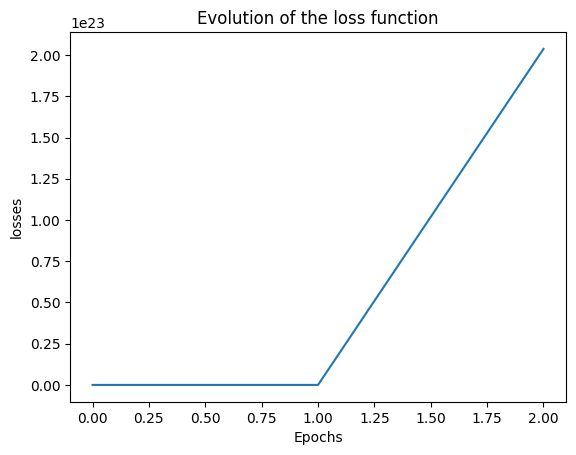

In [102]:

model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01))

history= model.fit(podiums_train,race_wins_train, epochs=2000,verbose=1)

losses = history.history['loss']

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel("losses")
plt.title("Evolution of the loss function")
plt.show()


In [112]:
# Manually define the test data
podiums_test = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
race_wins_test = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])


# Generate test predictions
race_wins_pred = model.predict(podiums_test)

mse= np.mean((race_wins_test-race_wins_pred.squeeze())**2)
# END: /c:/Users/Usuario/Desktop/Developments/Signals-Theory/Exercise_3_ST_(EFGV).ipynb



1/1 [==============================] - 0s 23ms/step


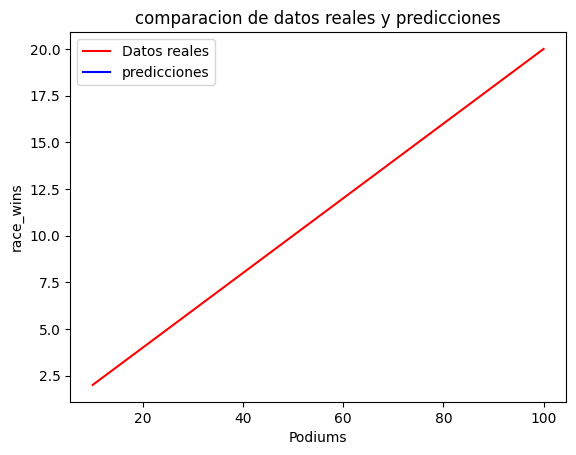

In [113]:
plt.plot(podiums_test,race_wins_test,"r",label="Datos reales")
plt.plot(podiums_test,race_wins_pred,"b",label="predicciones")
plt.legend()
plt.xlabel("Podiums")
plt.ylabel("race_wins")
plt.title("comparacion de datos reales y predicciones")
plt.show()



----------------------------------------------------
# BASE DATOS DE TEMPERATURA  VS VALOS DEL HELADO


In [39]:
# Load the new dataset
df = pd.read_csv('IceCreamSales-temperatures.csv')

# Extract the columns of interest and convert them to numpy arrays
temperature = df['Temperature'].to_numpy()
ice_cream_sales = df['Ice Cream Profits'].to_numpy()

# Print the extracted data
print("Temperatures:", temperature)
print("Ice Cream Sales:", ice_cream_sales)


Temperatures: [ 39  40  41  42  43  43  44  44  45  45  45  46  46  47  48  48  48  48
  48  48  49  49  50  50  50  50  50  51  51  52  52  52  52  52  53  53
  53  53  54  54  54  54  54  54  54  54  54  55  55  55  55  56  56  57
  57  58  58  58  58  58  58  59  59  59  59  59  59  59  59  60  60  60
  60  60  61  61  61  61  61  61  61  61  61  62  62  62  62  63  63  63
  63  63  64  64  64  64  64  64  64  64  64  65  65  65  65  65  65  65
  65  65  66  66  66  66  66  66  66  66  66  66  66  66  66  66  67  67
  67  67  67  67  68  68  68  68  68  68  68  68  68  68  68  68  69  69
  69  69  69  69  70  70  70  70  70  70  70  70  70  71  71  71  71  71
  71  71  71  71  72  72  72  72  72  72  72  72  72  72  73  73  73  73
  73  73  73  73  73  74  74  74  74  74  74  74  74  74  74  74  74  75
  75  75  75  75  75  76  76  76  76  76  76  76  76  76  76  76  77  77
  77  77  77  77  77  77  77  77  77  77  77  77  77  78  78  78  78  78
  78  78  78  78  78  78  78  79  79 

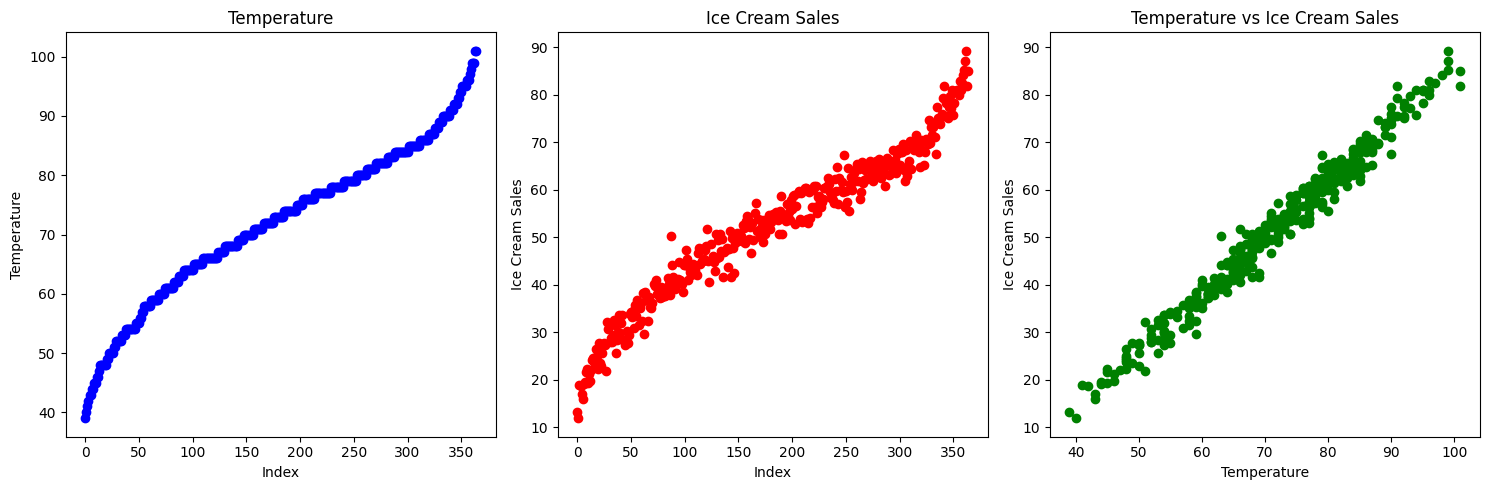

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot of Temperatures
axs[0].scatter(range(len(temperature)), temperature, color='blue')
axs[0].set_title('Temperature')
axs[0].set(xlabel='Index', ylabel='Temperature')

# Scatter plot of Ice Cream Sales
axs[1].scatter(range(len(ice_cream_sales)), ice_cream_sales, color='red')
axs[1].set_title('Ice Cream Sales')
axs[1].set(xlabel='Index', ylabel='Ice Cream Sales')

# Scatter plot of Temperature vs Ice Cream Sales
axs[2].scatter(temperature, ice_cream_sales, color='green')
axs[2].set_title('Temperature vs Ice Cream Sales')
axs[2].set(xlabel='Temperature', ylabel='Ice Cream Sales')

plt.tight_layout()
plt.show()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/1000
12/12 [==============================] - 0s 2ms/step - loss: inf  
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: nan
Epoch 3/1000
12/12 [==============================] - 0s 2ms/step - loss: nan
Epoch 4/1000
12/12 [==============================] - 0s 1ms/step - loss: nan
Epoch 5/1000
12/12 [==============================] - 0s 2ms/step - loss: nan
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: nan
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: nan

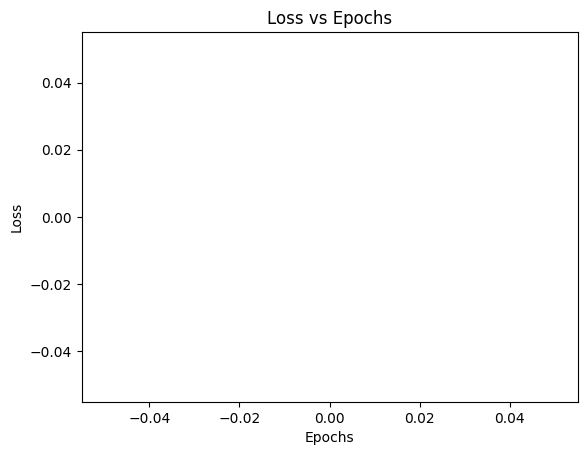

In [40]:
# Define the model
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01))
print(model.summary())

# Train the model
history = model.fit(temperature, ice_cream_sales, epochs=1000, verbose=1)
losses = history.history['loss']

# Plot the loss vs epochs
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

1/1 [==============================] - 0s 23ms/step


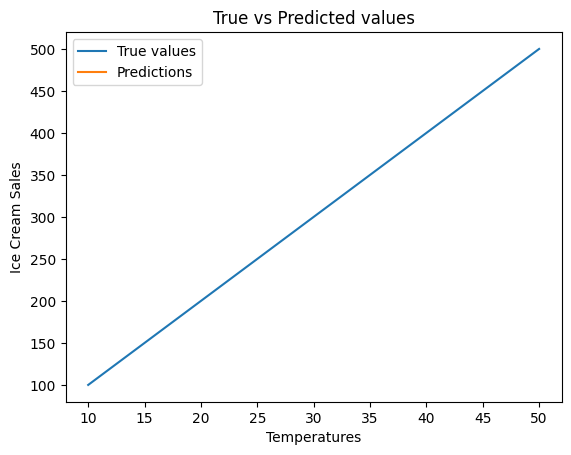

In [55]:


# Generate predictions and calculate the error on the test set
temperatures_test = np.array([10, 20, 30, 40, 50])
ice_cream_sales_test = np.array([100, 200, 300, 400, 500])
ice_cream_sales_pred = model.predict(temperatures_test)

mse = np.mean((ice_cream_sales_test - ice_cream_sales_pred.squeeze())**2)

plt.plot(temperatures_test, ice_cream_sales_test, label='True values')
plt.plot(temperatures_test, ice_cream_sales_pred, label='Predictions')
plt.legend()
plt.xlabel('Temperatures')
plt.ylabel('Ice Cream Sales')
plt.title('True vs Predicted values')
plt.show()


In [4]:
# Load the new dataset
df = pd.read_csv('Advertising.csv')

# Assuming the dataset has columns 'feature' and 'target'
# Extract the columns of interest and convert them to numpy arrays
feature = df['Radio'].to_numpy()
target = df['Sales'].to_numpy()


Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 1208553599664128.0000
Epoch 2/1000
7/7 [==============================] - 0s 512us/step - loss: 13123517204417179683977212985344.0000
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: inf                                  
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: inf
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: nan
Epoch 6/1000
7/7 [==============================] - 0s 3ms/step - loss: nan
Epoch 7/1000
7/7 [==============================] - 0s 3ms/step - loss: nan
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: nan
Epoch 9/1000
7/7 [==============================] - 0s 3ms/step - loss: nan
Epoch 10/1000
7/7 [==============================] - 0s 2ms/step - loss: nan
Epoch 11/1000
7/7 [==============================] - 0s 3ms/step - loss: nan
Epoch 12/1000
7/7 [==============================] - 0s 2ms/step - loss: n

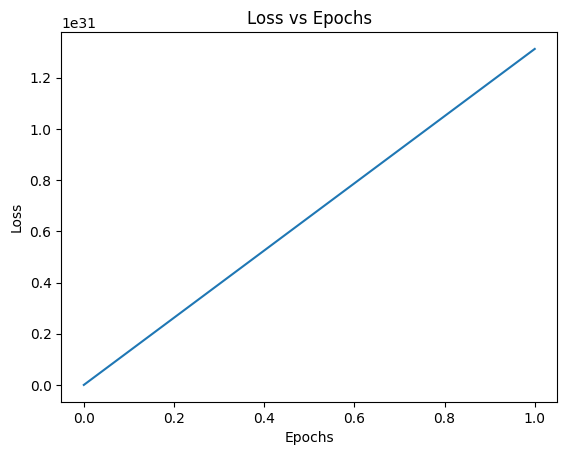

In [5]:
# Define the model
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01))

# Train the model
history = model.fit(feature, target, epochs=1000, verbose=1)
losses = history.history['loss']

# Plot the loss vs epochs
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

1/1 [==============================] - 0s 66ms/step


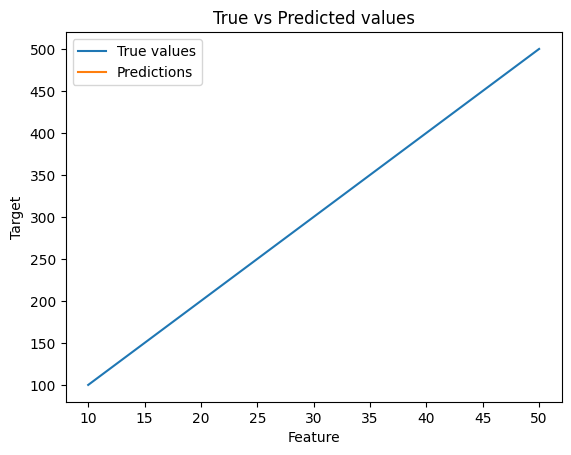

In [6]:



# Generate predictions and calculate the error on the test set
feature_test = np.array([10, 20, 30, 40, 50])
target_test = np.array([100, 200, 300, 400, 500])
target_pred = model.predict(feature_test)

mse = np.mean((target_test - target_pred.squeeze())**2)

plt.plot(feature_test, target_test, label='True values')
plt.plot(feature_test, target_pred, label='Predictions')
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('True vs Predicted values')
plt.show()
